In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from pandas.api.types import CategoricalDtype
import seaborn as sns
# import statsmodels
# from sklearn.linear_model import LogisticRegressio

In [74]:
blue_eatraw = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\raw\blue_eat/csvs/"
yellow_eatraw = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\raw\yellow_eat/csvs/"


In [75]:
# yellow_df = pd.concat([pd.read_csv(f"{yellow_eatp}{f}", encoding="utf-8") for f in os.listdir(yellow_eatp)])
blue_dfraw = pd.concat([pd.read_csv(f"{blue_eatraw}{f}", encoding="utf-8") for f in os.listdir(blue_eatraw)])
# drop empty columns
blue_dfraw = blue_dfraw.dropna(axis=1, how="all")
yellow_dfraw = pd.concat([pd.read_csv(f"{yellow_eatraw}{f}", encoding="utf-8") for f in os.listdir(yellow_eatraw)])
# drop empty columns
yellow_dfraw = yellow_dfraw.dropna(axis=1, how="all")

In [76]:
dirs = ["blue_chains", "blue_eat", "blue_shop", "green_chains", "green_shop", "yellow_eat", "yellow_shop"]
p = "../data/raw/{}/"
v = 0
for d in dirs:
    v+=len(os.listdir(p.format(d)))

In [77]:
# yelrevs = pd.read_csv("../data/reviews/yellow_eat/yellow_eat_id4650-5221_start_0-500.csv", encoding="utf-8")
# bluerevs = pd.read_csv("../data/reviews/blue_eat/blue_eat_id215-748_start_0-500.csv", encoding="utf-8")

In [78]:
# len(yelrevs) + len(bluerevs)

# Google maps Reasons Analysis

In [79]:
# types of reasons bluerevs原因"
SOURCES = {
    "官方資訊 " : "Official",
    "傳媒報導" : "Media",
    "老闆/店員私下言論 ": "Comments",
    "只屬傳言": "Hearsay"
}
dct = {}
for source in SOURCES.values():
    dct[source] = [col for col in blue_dfraw.columns if f"Reason_{source}" in col]
    subset = blue_dfraw[dct[source]]
    # check if any of the that source columns not null     
    blue_dfraw[f"has_{source}"] = ~subset.isnull().apply(lambda x: all(x), axis=1) 
    blue_dfraw[f"{source}_total"] = subset.count(1)

    

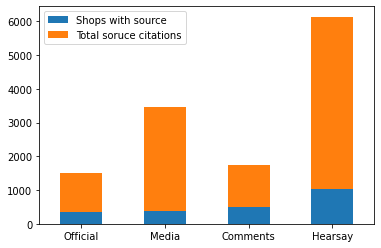

In [80]:
has_cols = [col for col in blue_dfraw.columns if f"has_" in col]
total_cols = [col for col in blue_dfraw.columns if "_total" in col]
# blue_dfraw.plot.bar(y = has_cols
sourcesseries = blue_dfraw[has_cols+total_cols].sum(axis=0)
index = SOURCES.values()
has = list(blue_dfraw[has_cols].sum(axis=0))
tot = list(blue_dfraw[total_cols].sum(axis=0))
df = pd.DataFrame({'Shops with source': has,
                   'Total soruce citations': tot}, index=index)
ax = df.plot.bar(rot=0, stacked=True)

# Todo: Change color scheme 

In [81]:
df

,Shops with source,Total soruce citations
Official,360,1150
Media,378,3097
Comments,503,1243
Hearsay,1042,5094


KeyError: 'Shops With Source'

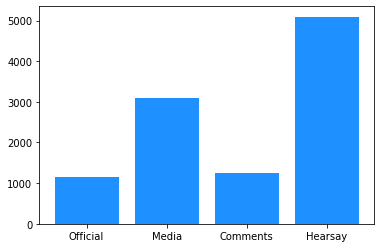

In [82]:
fig, ax = plt.subplots()

ax.bar(df.index, df["Total soruce citations"],
       label="Total Source Citations",
       color="dodgerblue")
ax.bar(df.index, 
       df["Shops With Source"],
       label ="Shops with source",
       color="grey")

# ax.set_ylabel('Sources')
ax.set_title('Figure 1: Sources for Blue Shop Categorization')
ax.legend()

# plt.show()
plt.savefig("sources.png")

In [ ]:
# total_cols.append("Name")
blue_dfraw[total_cols + ["Name"]].iloc[1220:1240]



In [ ]:
total_cols + ["Name2"]


# Shop metadata analysis

In [83]:
# blue_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\shop_meta\blue_eat/20210702/"
# yellow_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\shop_meta\yellow_eat//20210702/"
# blue_meta = pd.concat([pd.read_csv(f"{blue_eatp}{f}", encoding="utf-8", index_col="id") for f in os.listdir(blue_eatp)])
# yellow_meta = pd.concat([pd.read_csv(f"{yellow_eatp}{f}", encoding="utf-8", index_col="id") for f in os.listdir(yellow_eatp)])
# blue_meta['Name'] = blue_dfraw.Name
# yellow_meta['Name'] = yellow_dfraw.Name
blue_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\blue_eat_0_None.csv"
yellow_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\yellow_eat_0_None.csv"
blue_meta = pd.read_csv(f"{blue_eatp}", encoding="utf-8", index_col="id")
yellow_meta = pd.read_csv(f"{yellow_eatp}", encoding="utf-8", index_col="id")
or2dist = pd.read_excel("../data/politics/openrice2district.xlsx")

yellow_meta = yellow_meta.reset_index().merge(or2dist, how="left", left_on="district", right_on="OpenRice Area").set_index("id")
blue_meta = blue_meta.reset_index().merge(or2dist, how="left", left_on="district", right_on="OpenRice Area").set_index("id")

# yellow_meta["color"] = "Yellow"
# blue_meta["color"] = "Blue"
# masterdf = pd.concat([yellow_meta, blue_meta])

In [84]:
# or2dist
blue_meta
# yellow_meta.original_url

,Unnamed: 0,original_url,scrape_time,title_main,title_add,response_url,reviews_url,jobs_link,num_jobs,additional_info,...,other_Exclusive_Online_Booking,other_Live_Music,other_Restaurant_Mode_of_Operation_-_Type_D,other_Accessible_Environment,other_Catering_Service,other_Certified_Halal_Food,OpenRice Area,District Council,Potential Secondary,Notes
id,,,,,,,,,,,,,,,,,,,,,
215,0,https://s.openrice.com/QrbS0HQ0700~dfFvOE8UE,2021-07-05 02:57:45,#OMG,(Closed),https://www.openrice.com/en/hongkong/r-omg-tai...,https://www.openrice.com/en/hongkong/r-omg-tai...,https://www.openrice.com/en/hongkong/r-omg-tai...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tai Kok Tsui,Yau Tsim Mong,NaN,NaN
216,1,https://s.openrice.com/QrbS0nMS800~doI7kMWdh,2021-07-05 02:57:53,% Arabica,NaN,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,Central & Western,NaN,NaN
217,2,https://s.openrice.com/QrbS05v0900~doI7kMWdh,2021-07-05 02:57:56,% Arabica,NaN,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Central,Central & Western,NaN,NaN
218,3,https://s.openrice.com/QrbS0S2O900~doI7kMWdh,2021-07-05 02:57:59,% Arabica,NaN,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Quarry Bay,Eastern,NaN,NaN
219,4,https://s.openrice.com/QrbS00zW4W0~doI7kMWdh,2021-07-05 02:58:01,% Arabica,NaN,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tsim Sha Tsui,Yau Tsim Mong,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,1877,https://s.openrice.com/QrbS09t8100,2021-07-05 09:24:24,龍島 (太古站),NaN,https://www.openrice.com/en/hongkong/r-lucullu...,https://www.openrice.com/en/hongkong/r-lucullu...,https://www.openrice.com/en/hongkong/r-lucullu...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tai Koo,Eastern,NaN,NaN
2247,1878,https://s.openrice.com/QrbS0lGS000~d0vNLZD4L,2021-07-05 09:24:26,龍華酒店,NaN,https://www.openrice.com/en/hongkong/r-lung-wa...,https://www.openrice.com/en/hongkong/r-lung-wa...,https://www.openrice.com/en/hongkong/r-lung-wa...,NaN,茶芥每位$13,...,NaN,NaN,NaN,NaN,NaN,NaN,Sha Tin,Sha Tin,NaN,NaN
2251,1879,https://s.openrice.com/QrbS03rSA00,2021-07-05 09:24:28,반찬앤쿡 Banchan and Cook (太古城中心),NaN,https://www.openrice.com/en/hongkong/r-banchan...,https://www.openrice.com/en/hongkong/r-banchan...,https://www.openrice.com/en/hongkong/r-banchan...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tai Koo,Eastern,NaN,NaN


In [85]:
catcols = [col for col in blue_meta.columns if "categor" in col]
paycols = [col for col in blue_meta.columns if "payment_method" in col]

In [86]:
# yellow_meta.categories_1

In [87]:
drops = ['original_url', 'scrape_time', 'response_url', 'reviews_url', 'jobs_link', 'District Council',
       'Potential Secondary', 'Notes',  'payment_method_0', 'payment_method_1', 'payment_method_2',
       'payment_method_3', 'payment_method_4', 'payment_method_5','payment_method_6','categories_0', 'categories_1', "additional_info", "Name",
        "other_Restaurant_Mode_of_Operation_-_Type_B", 'num_jobs',]
display1 = blue_meta.drop(drops, axis=1)
display1["categories"] = blue_meta[catcols].values.tolist()
display1["payment_methods"] = blue_meta[catcols].values.tolist()


KeyError: "['Name'] not found in axis"

In [88]:
display1.columns = display1.rename({
    "title_add": "Closed",
    "Title Main": "Restaruant Name",
    "num_jobs": "Job"
    
}, axis=1).columns.str.title().str.replace("Other_", "").str.replace("_", " ")
display1.T.head(20)

NameError: name 'display1' is not defined

In [89]:
bluecatcols = [col for col in blue_meta.columns if "categories" in col]
yellowcatcols = [col for col in yellow_meta.columns if "categories" in col]
for col in bluecatcols:
    blue_meta[col] = blue_meta[col].astype("category")
for col in yellowcatcols:
    yellow_meta[col] = yellow_meta[col].astype("category")
totalcatcols = set()
[totalcatcols.add(col) for col in bluecatcols]
[totalcatcols.add(col) for col in yellowcatcols]

[None, None, None, None, None, None, None, None, None, None]

In [90]:
# print(blue_meta.columns)
blue_meta.index

Int64Index([ 215,  216,  217,  218,  219,  220,  221,  222,  223,  224,
            ...
            2245, 2248, 2249, 2228, 2240, 2244, 2247, 2251, 2252, 2253],
           dtype='int64', name='id', length=1882)

## Closed analysis

In [91]:
blue_closed = blue_meta[blue_meta.title_add  == "(Closed)"]
yellow_closed = yellow_meta[yellow_meta.title_add  == "(Closed)"]
print(f"Blue closed rate: {len(blue_closed) / len(blue_meta)}")
print(f"Yellow closed rate: {len(yellow_closed) / len(yellow_meta)}")
# yellow_closed = yellow_meta[yellow_meta.title_add.notna()]

Blue closed rate: 0.08501594048884166
Yellow closed rate: 0.044662795891022775


In [26]:
blue_closed[range]

,Unnamed: 0,original_url,scrape_time,title_main,title_add,response_url,reviews_url,jobs_link,num_jobs,additional_info,...,other_Live_Music,other_Restaurant_Mode_of_Operation_-_Type_D,other_Accessible_Environment,other_Catering_Service,other_Certified_Halal_Food,OpenRice Area,District Council,Potential Secondary,Notes,color
0,0,https://s.openrice.com/QrbS0HQ0700~dfFvOE8UE,2021-07-05 02:57:45,#OMG,(Closed),https://www.openrice.com/en/hongkong/r-omg-tai...,https://www.openrice.com/en/hongkong/r-omg-tai...,https://www.openrice.com/en/hongkong/r-omg-tai...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tai Kok Tsui,Yau Tsim Mong,NaN,NaN,Blue
26,26,https://s.openrice.com/QrbS00B0600~un_sIAA,2021-07-05 03:14:32,Babbo Trattoria,(Closed),https://www.openrice.com/en/hongkong/r-babbo-t...,https://www.openrice.com/en/hongkong/r-babbo-t...,https://www.openrice.com/en/hongkong/r-babbo-t...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Causeway Bay,Wan Chai,NaN,NaN,Blue
29,29,https://s.openrice.com/QrbS0buy400,2021-07-05 03:14:39,BEAT Bakery,(Closed),https://www.openrice.com/en/hongkong/r-beat-ba...,https://www.openrice.com/en/hongkong/r-beat-ba...,https://www.openrice.com/en/hongkong/r-beat-ba...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tsim Sha Tsui,Yau Tsim Mong,NaN,NaN,Blue
53,53,https://s.openrice.com/QrbS0fZ8800~d5vM0wwBE,2021-07-05 03:17:42,can‧teen,(Closed),https://www.openrice.com/en/hongkong/r-can-tee...,https://www.openrice.com/en/hongkong/r-can-tee...,https://www.openrice.com/en/hongkong/r-can-tee...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Central,Central & Western,NaN,NaN,Blue
55,55,https://s.openrice.com/QrbS046CA00,2021-07-05 03:17:45,Chicken 852,(Closed),https://www.openrice.com/en/hongkong/r-chicken...,https://www.openrice.com/en/hongkong/r-chicken...,https://www.openrice.com/en/hongkong/r-chicken...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kowloon Bay,Kwun Tong,NaN,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,1826,https://s.openrice.com/QrbS0jpC800~d_lj_OCZI,2021-07-05 09:21:11,鴻福燒鵝海鮮酒家,(Closed),https://www.openrice.com/en/hongkong/r-good-ta...,https://www.openrice.com/en/hongkong/r-good-ta...,https://www.openrice.com/en/hongkong/r-good-ta...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,To Kwa Wan,Kowloon City,NaN,NaN,Blue
1829,1829,https://s.openrice.com/QrbS0d3O000~dZcfF01s4,2021-07-05 09:21:35,新濠茶餐廳,(Closed),https://www.openrice.com/en/hongkong/r-%E6%96%...,https://www.openrice.com/en/hongkong/r-%E6%96%...,https://www.openrice.com/en/hongkong/r-%E6%96%...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tai Po,Tai Po,NaN,NaN,Blue
1846,1846,https://www.openrice.com/zh/hongkong/r-%E9%BE%...,2021-07-05 09:23:04,龍島,(Closed),https://www.openrice.com/en/hongkong/r-lucullu...,https://www.openrice.com/en/hongkong/r-lucullu...,https://www.openrice.com/en/hongkong/r-lucullu...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tsuen Wan,Tsuen Wan,NaN,NaN,Blue
1854,1854,https://s.openrice.com/QrbS09ouA00,2021-07-05 09:23:39,點秋香,(Closed),https://www.openrice.com/en/hongkong/r-dim-cha...,https://www.openrice.com/en/hongkong/r-dim-cha...,https://www.openrice.com/en/hongkong/r-dim-cha...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Aberdeen,Southern,NaN,NaN,Blue


In [27]:
# # 
# bluerev = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\reviews\blue_eat\blue_eat_id749-2255_start_500-2256.csv"
# yellowrev = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\reviews\yellow_eat\yellow_eat_id5222-7085_start_500-7086.csv"
# bluerevs = pd.read_csv(bluerev, encoding="utf-8")
# yellowrevs = pd.read_csv(yellowrev, encoding="utf-8")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tlebr\\OneDrive - pku.edu.cn\\China in Transition\\openrice\\data\\reviews\\blue_eat\\blue_eat_id749-2255_start_500-2256.csv'

In [28]:
# def group1(df1):
#     grouped = df1.groupby("id")
#     df = pd.DataFrame()
#     df["total_reviews"] = grouped.url.count()
#     df["mean_service"] = grouped["service"].mean()
#     df["hygiene"] = grouped["hygiene"].mean()
#     df["value"] = grouped["value"].mean()
#     df["decor"] = grouped["decor"].mean()
#     df["taste"] = grouped["taste"].mean()
#     df["first_review"] = grouped.date.min()
#     df["last_review"] = grouped.date.max()
#     return df

In [61]:
# df = group1(bluerevs)
# blue_closed = blue_closed.merge(df, how="inner", right_index=True, left_index=True)
# df = group1(yellowrevs)
# blue_closed = yellow_closed.merge(df, how="inner", right_index=True, left_index=True)

## By district

In [39]:
# ### POLITICAL RECORD BY DISTRICT COUNCIL
polidf19 = pd.read_excel(r"../data/politics/local_main.xlsx", sheet_name="2019 local elections")
polidf15 = pd.read_excel(r"../data/politics/local_main.xlsx", sheet_name="2015 local elections")

polidf19.dropna(how="all", inplace=True)
polidf15.dropna(how="all", inplace=True)
merged = polidf15.merge(polidf19, how="inner", on="Council")
merged = merged.set_index("Council")

merged.head()

merged = merged.rename({
        "Yellow Composition_x" : "Yellow_Composition2015",
        "Yellow Composition_y" : "Yellow_Composition2019",
              }, axis=1)
# merged[["Yellow Composition_x"]]

compositions = merged[["Yellow_Composition2015", 
                       "Yellow_Composition2019",
                      "Population (2016)",
                      "Density(/km^2)"]].copy()


mean2015 = compositions.loc["TOTAL"].Yellow_Composition2015
mean2019 = compositions.loc["TOTAL"].Yellow_Composition2019

compositions["From_mean2015"] = compositions["Yellow_Composition2015"] - mean2015
compositions["From_mean2019"] = compositions["Yellow_Composition2019"] - mean2019

# yb score is percentage yellow: 
# a higher score means a higher amount yellow. 

compositions["yb_score"] = compositions.Yellow_Composition2015 + compositions.Yellow_Composition2019

compositions["yb_score"].sort_values()

compositions["Class_"] = "Green"

conditions = [
    (compositions["From_mean2015"] > 0) & (compositions["From_mean2019"] > 0),
    (compositions["From_mean2015"] < 0) & (compositions["From_mean2019"] < 0),
    
]
compositions["Class_"] = np.select(conditions, ["Yellow", "Blue"], default="Green")
#           (compositions.Yellow_Composition2015 > 0) & (compositions.Yellow_Composition2019 > 0), "Yellow", "Green")

compositions

,Yellow_Composition2015,Yellow_Composition2019,Population (2016),Density(/km^2),From_mean2015,From_mean2019,yb_score,Class_
Council,,,,,,,,
Central & Western,0.266667,0.933333,243266.0,19391.0,-0.029804,0.071111,1.200000,Green
Wan Chai,0.153846,0.692308,180123.0,17137.0,-0.142624,-0.169915,0.846154,Blue
Eastern,0.285714,0.914286,555034.0,30861.0,-0.010756,0.052063,1.200000,Green
Southern,0.294118,0.882353,274994.0,7080.0,-0.002353,0.020131,1.176471,Green
Yau Tsim Mong,0.157895,0.850000,342970.0,49748.0,-0.138576,-0.012222,1.007895,Blue
Sham Shui Po,0.478261,0.916667,405869.0,43381.0,0.181790,0.054444,1.394928,Yellow
Kowloon City,0.166667,0.600000,418732.0,41802.0,-0.129804,-0.262222,0.766667,Blue
Wong Tai Sin,0.375000,1.000000,425235.0,45748.0,0.078529,0.137778,1.375000,Yellow
Kwun Tong,0.243243,0.700000,648541.0,57530.0,-0.053227,-0.162222,0.943243,Blue


In [57]:
compositions["Pro-democracy"] = 100*(compositions.Yellow_Composition2015	+ compositions.Yellow_Composition2019) / 2
compositions["Pro-establishment"] = 100 - compositions["Pro-democracy"]

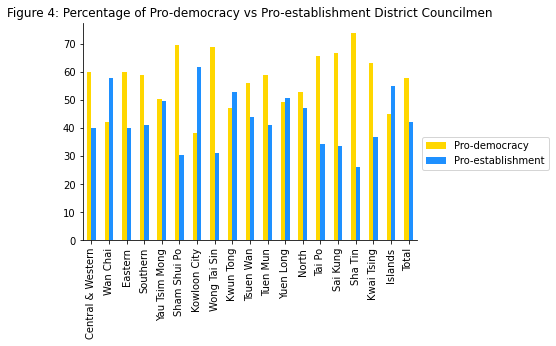

In [122]:
# compositions = compositions.rename({"TOTAL": "Total"})
ax = compositions[["Pro-democracy", "Pro-establishment"]].plot(kind="bar", color=["gold", "dodgerblue"]
#                                                                , legend=False
                                    )
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.set_title("Figure 4: Percentage of Pro-democracy vs Pro-establishment District Councilmen")
ax.set_xlabel("")
# ax.axes.get_xaxis().set_visible(False)
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.savefig("disticts2.png", bbox_inches="tight")
# plt.tight_layout()
# = False

In [22]:
top_districts = (yellow_meta["District Council"].value_counts() + blue_meta["District Council"].value_counts()).sort_values(ascending=False).iloc[:20].index


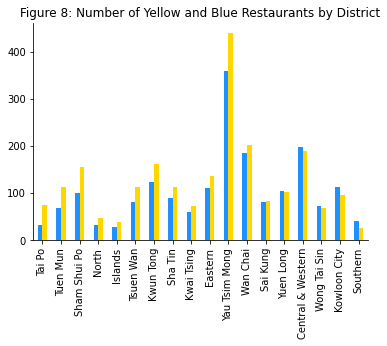

In [132]:
# index = top_districts



df = pd.DataFrame({'Blue': (blue_meta["District Council"].value_counts()),
                   'Yellow': (yellow_meta["District Council"].value_counts())})
# .sort_values("Yellow")
df["diff"] = df.Yellow - df.Blue
df["summ"] = df.Yellow + df.Blue
df["percent"] = df.Blue / df["summ"]
df = df.sort_values(by="percent")
my_colors = ["dodgerblue", "gold"]
ax = df[["Blue", "Yellow"]].plot.bar(color=my_colors, legend=False, 
                                     title="Figure 8: Number of Yellow and Blue Restaurants by District")
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

# plt.tight_layout()
# plt.get(False)
plt.savefig("disricts.png", bbox_inches="tight")

In [34]:
df

,Blue,Yellow,diff,summ,percent
Tai Po,33,75,42,108,0.305556
Tuen Mun,68,112,44,180,0.377778
Sham Shui Po,101,155,54,256,0.394531
North,33,48,15,81,0.407407
Islands,28,39,11,67,0.417910
Tsuen Wan,82,113,31,195,0.420513
Kwun Tong,123,161,38,284,0.433099
Sha Tin,89,114,25,203,0.438424
Kwai Tsing,59,73,14,132,0.446970
Eastern,111,136,25,247,0.449393


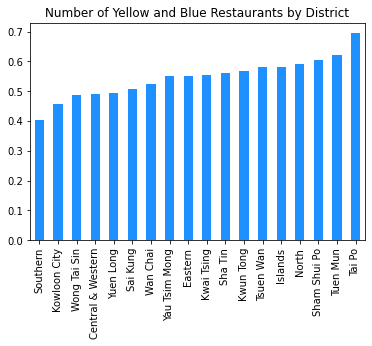

In [55]:
ax = df[["percent"]].plot.bar(color="dodgerblue", legend=False, title="Number of Yellow and Blue Restaurants by District")

In [32]:
top_districts = (yellow_meta.district.value_counts() + blue_meta.district.value_counts()).sort_values(ascending=False).iloc[:20].index
# /len(yellow_meta)

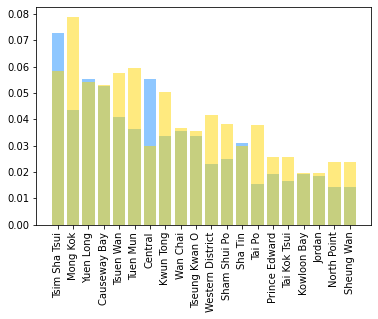

In [33]:

plt.bar(top_districts, (blue_meta.district.value_counts()/len(blue_meta)).loc[top_districts], 
        color="dodgerblue", alpha=.5)
plt.bar(top_districts, (yellow_meta.district.value_counts()/len(blue_meta)).loc[top_districts],
       color="gold", alpha=.5)

plt.xticks(rotation="vertical");

In [ ]:
biggest_diff = abs((yellow_meta.district.value_counts()/len(yellow_meta)) - (blue_meta.district.value_counts()/len(blue_meta))).sort_values(ascending=False).iloc[:20]


In [133]:
((yellow_meta.district.value_counts()/len(yellow_meta)) - (blue_meta.district.value_counts()/len(blue_meta))).loc[biggest_diff.index]

Central            -0.030193
Tsim Sha Tsui      -0.023115
Mong Kok            0.022414
Tai Po              0.016664
Tuen Mun            0.013818
Western District    0.011927
Tai Koo            -0.011527
Yuen Long          -0.010193
Kwun Tong           0.008907
Kwai Fong           0.008428
Lai Chi Kok         0.008214
Wong Tai Sin       -0.008079
Tai Wai             0.008045
Hung Hom           -0.007819
Cheung Chau         0.007662
Causeway Bay       -0.007549
Tsuen Wan           0.006752
Sham Shui Po        0.006617
Admiralty          -0.006323
Sha Tin            -0.006312
Name: district, dtype: float64

In [66]:
df = pd.read_json("../data/district/dist_by_cuisine1.json")

In [74]:
blue_meta.columns

Index(['original_url', 'scrape_time', 'title_main', 'title_add',
       'response_url', 'reviews_url', 'jobs_link', 'num_jobs',
       'additional_info', 'number_of_seats', 'mean_rating', 'bookmark_count',
       'district', 'price_range', 'mean_taste', 'mean_decor', 'mean_service',
       'mean_hygiene', 'mean_value', 'categories_0', 'categories_1',
       'positive_reviews', 'ok_reviews', 'negative_reviews', 'total_reviews',
       'payment_method_0', 'payment_method_1', 'payment_method_2',
       'payment_method_3', 'payment_method_4', 'payment_method_5',
       'payment_method_6', 'other_Restaurant_Mode_of_Operation_-_Type_B',
       'other_May_Bring_Your_Own_Wine', 'other_10%_Service_Charge',
       'other_Outdoor_Seating', 'Name', 'OpenRice Area', 'District Council',
       'Potential Secondary', 'Notes'],
      dtype='object')

In [115]:
merged = df.merge(blue_meta.groupby("OpenRice Area").count().original_url, how="inner", left_index=True, right_index=True)
merged = merged.merge(yellow_meta.groupby("OpenRice Area").count().original_url, how="inner", left_index=True, right_index=True)

In [116]:
merged.columns = ["full_count", "blue_count", "yellow_count"]
merged["green_count"] = merged.full_count - merged.blue_count - merged.yellow_count
merged.loc["total"] = merged.sum()
merged["yellow_percent"] = merged.yellow_count / merged.full_count
merged["blue_percent"] = merged.blue_count / merged.full_count
merged["yellow_vs_blue"] = merged.yellow_count / (merged.yellow_count + merged.blue_count)

In [117]:
merged

,full_count,blue_count,yellow_count,green_count,yellow_percent,blue_percent,yellow_vs_blue
Aberdeen,256,14,8,234,0.031250,0.054688,0.363636
Admiralty,183,16,6,161,0.032787,0.087432,0.272727
Ap Lei Chau,144,10,13,121,0.090278,0.069444,0.565217
Causeway Bay,1193,99,102,992,0.085499,0.082984,0.507463
Central,1351,105,55,1191,0.040711,0.077720,0.343750
...,...,...,...,...,...,...,...
Wong Tai Sin,237,22,8,207,0.033755,0.092827,0.266667
Yau Ma Tei,302,14,19,269,0.062914,0.046358,0.575758
Yau Tong,124,3,5,116,0.040323,0.024194,0.625000
Yuen Long,1465,105,102,1258,0.069625,0.071672,0.492754


In [120]:
merged.sort_values("blue_percent")

,full_count,blue_count,yellow_count,green_count,yellow_percent,blue_percent,yellow_vs_blue
Fo Tan,164,1,8,155,0.048780,0.006098,0.888889
Tai O,71,1,3,67,0.042254,0.014085,0.750000
Happy Valley,138,2,1,135,0.007246,0.014493,0.333333
Cheung Chau,189,4,22,163,0.116402,0.021164,0.846154
Ngau Tau Kok,170,4,14,152,0.082353,0.023529,0.777778
...,...,...,...,...,...,...,...
Wong Tai Sin,237,22,8,207,0.033755,0.092827,0.266667
Tai Wo,43,4,4,35,0.093023,0.093023,0.500000
Ho Man Tin,109,11,13,85,0.119266,0.100917,0.541667
Sham Tseng,46,5,3,38,0.065217,0.108696,0.375000


In [121]:
merged.sort_values("yellow_percent")

,full_count,blue_count,yellow_count,green_count,yellow_percent,blue_percent,yellow_vs_blue
Happy Valley,138,2,1,135,0.007246,0.014493,0.333333
Lantau Island,118,3,2,113,0.016949,0.025424,0.400000
Pok Fu Lam,88,5,2,81,0.022727,0.056818,0.285714
Tung Chung,206,13,5,188,0.024272,0.063107,0.277778
Tai Koo,202,25,5,172,0.024752,0.123762,0.166667
...,...,...,...,...,...,...,...
Cheung Chau,189,4,22,163,0.116402,0.021164,0.846154
Ho Man Tin,109,11,13,85,0.119266,0.100917,0.541667
Tsz Wan Shan,104,6,15,83,0.144231,0.057692,0.714286
Sai Wan Ho,177,13,27,137,0.152542,0.073446,0.675000


In [118]:
merged.sort_values("yellow_vs_blue")

,full_count,blue_count,yellow_count,green_count,yellow_percent,blue_percent,yellow_vs_blue
Tai Koo,202,25,5,172,0.024752,0.123762,0.166667
Wong Tai Sin,237,22,8,207,0.033755,0.092827,0.266667
Admiralty,183,16,6,161,0.032787,0.087432,0.272727
Tung Chung,206,13,5,188,0.024272,0.063107,0.277778
Pok Fu Lam,88,5,2,81,0.022727,0.056818,0.285714
...,...,...,...,...,...,...,...
Lai Chi Kok,282,8,27,247,0.095745,0.028369,0.771429
Tai Hang,103,5,17,81,0.165049,0.048544,0.772727
Ngau Tau Kok,170,4,14,152,0.082353,0.023529,0.777778
Cheung Chau,189,4,22,163,0.116402,0.021164,0.846154


In [82]:
df = pd.read_csv("../data/district/ORdistdata.csv", index_col="district_name")
df
# 

,restaruant_count
district_name,
Kowloon,11720
New Territories,9876
Hong Kong Island,8276
Tsim Sha Tsui,1948
Yuen Long,1465
...,...
O’South Coast,25
Deep Water Bay,13
Lok Ma Chau,11


### Blue districtwith comments

In [115]:
blue_meta_hascomments = blue_dfraw[blue_dfraw.has_Comments][["Name", "id"]].merge(blue_meta, left_on="id", 
                                                                                  right_index=True, how="inner")

districtdf = pd.DataFrame(index= or2dist["District Council"].unique())


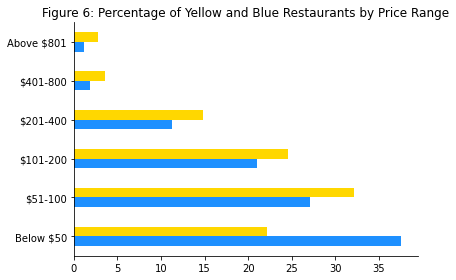

In [117]:
yellow_meta["price_range"] = yellow_meta["price_range"].astype("category")
blue_meta["price_range"] = blue_meta["price_range"].astype("category")
yelpr = blue_meta_hascomments.price_range
bluepr = blue_meta[blue_meta["price_range"].notna()].price_range

df = pd.DataFrame({ "Blue": (bluepr.value_counts()*100 / len(blue_meta)),
    "Yellow": (yelpr.value_counts()*100/ len(blue_meta_hascomments))}, index=['Below $50', '$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])
ax = df.plot.barh(color=my_colors, 
                  legend=False, 
                  title="Figure 6: Percentage of Yellow and Blue Restaurants by Price Range",
#                 ylabel="Number of Restaurants"
                 )
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.tight_layout()
# plt.savefig("pricerange.png", bbox_inches="tight")

# plt.bar(blue_meta_hascomments.price_range.unique, (blue_meta_hascomments.price_range.value_counts() / len(blue_meta_hascomments)))
# plt.bar(blue_meta.price_range.values, (blue_meta.price_range.value_counts() / len(blue_meta)))

In [455]:
(blue_meta_hascomments.price_range.value_counts() / len(blue_meta_hascomments))

$51-100       0.321353
$101-200      0.245243
Below $50     0.221987
$201-400      0.147992
$401-800      0.035941
Above $801    0.027484
Name: price_range, dtype: float64

In [450]:
blue_meta.price_range.values

array(['$101-200', 'Below $50', 'Below $50', ..., '$101-200', '$101-200',
       '$101-200'], dtype=object)

In [435]:
blue_meta.price_range.value_counts() / len(blue_meta)

Below $50     0.375664
$51-100       0.270457
$101-200      0.210414
$201-400      0.112115
$401-800      0.019129
Above $801    0.011690
Name: price_range, dtype: float64

In [418]:
districtdf["Blue_Counts"] =  blue_meta["District Council"].value_counts()
districtdf["Yellow_Counts"] =  yellow_meta["District Council"].value_counts()
districtdf["YB_Counts"] =  districtdf["Blue_Counts"] + districtdf["Yellow_Counts"]
districtdf["Blue_Percent"] =  districtdf["Blue_Counts"] / districtdf["YB_Counts"]
districtdf["Yellow_Percent"] =  districtdf["Yellow_Counts"] / districtdf["YB_Counts"]
districtdf["YB_Percent"] =  districtdf["YB_Counts"] / sum(districtdf["YB_Counts"])
districtdf["Blue_Comment_Counts"] = blue_meta_hascomments["District Council"].value_counts()
districtdf["Blue_Comment_Percent"] =  districtdf["Blue_Comment_Counts"] / (districtdf["YB_Counts"])

In [419]:
districtdf.loc["TOTAL"] = districtdf.sum()

In [420]:
# 
# districtdf["YB_Counts"] / sum(districtdf["YB_Counts"])
districtdf["YB_Counts"] / sum(districtdf["YB_Counts"])

Southern             0.008139
Central & Western    0.047133
Wan Chai             0.047133
Eastern              0.030005
Islands              0.008139
Sham Shui Po         0.031098
Wong Tai Sin         0.017007
North                0.009840
Sha Tin              0.024660
Kowloon City         0.025510
Yau Tsim Mong        0.096939
Kwun Tong            0.034500
Kwai Tsing           0.016035
Tsuen Wan            0.023688
Sai Kung             0.020165
Tai Po               0.013120
Tuen Mun             0.021866
Yuen Long            0.025024
TOTAL                0.500000
Name: YB_Counts, dtype: float64

In [421]:
districtdf = districtdf.merge(compositions, left_index=True, right_index=True)

In [426]:
districtdf.sort_values("yb_score")

,Blue_Counts,Yellow_Counts,YB_Counts,Blue_Percent,Yellow_Percent,YB_Percent,Blue_Comment_Counts,Blue_Comment_Percent,Yellow_Composition2015,Yellow_Composition2019,Population (2016),Density(/km^2),From_mean2015,From_mean2019,yb_score,Class_
Kowloon City,114.0,96.0,210.0,0.542857,0.457143,0.051020,20.0,0.095238,0.166667,0.600000,418732.0,41802.0,-0.129804,-0.262222,0.766667,Blue
Wan Chai,185.0,203.0,388.0,0.476804,0.523196,0.094266,63.0,0.162371,0.153846,0.692308,180123.0,17137.0,-0.142624,-0.169915,0.846154,Blue
Islands,28.0,39.0,67.0,0.417910,0.582090,0.016278,8.0,0.119403,0.200000,0.700000,156801.0,886.0,-0.096471,-0.162222,0.900000,Blue
Kwun Tong,123.0,161.0,284.0,0.433099,0.566901,0.068999,25.0,0.088028,0.243243,0.700000,648541.0,57530.0,-0.053227,-0.162222,0.943243,Blue
Yuen Long,104.0,102.0,206.0,0.504854,0.495146,0.050049,30.0,0.145631,0.142857,0.846154,607200.0,4435.0,-0.153613,-0.016068,0.989011,Blue
Yau Tsim Mong,359.0,439.0,798.0,0.449875,0.550125,0.193878,100.0,0.125313,0.157895,0.850000,342970.0,49748.0,-0.138576,-0.012222,1.007895,Blue
North,33.0,48.0,81.0,0.407407,0.592593,0.019679,4.0,0.049383,0.222222,0.833333,315270.0,2310.0,-0.074248,-0.028889,1.055556,Blue
Tsuen Wan,82.0,113.0,195.0,0.420513,0.579487,0.047376,25.0,0.128205,0.235294,0.888889,318916.0,5149.0,-0.061176,0.026667,1.124183,Green
TOTAL,1881.0,2235.0,4116.0,8.181556,9.818444,1.000000,473.0,1.973145,0.296471,0.862222,7328406.0,369057.0,0.000000,0.000000,1.158693,Green
Southern,40.0,27.0,67.0,0.597015,0.402985,0.016278,16.0,0.238806,0.294118,0.882353,274994.0,7080.0,-0.002353,0.020131,1.176471,Green


In [423]:
districtdf.corr()

,Blue_Counts,Yellow_Counts,YB_Counts,Blue_Percent,Yellow_Percent,YB_Percent,Blue_Comment_Counts,Blue_Comment_Percent,Yellow_Composition2015,Yellow_Composition2019,Population (2016),Density(/km^2),From_mean2015,From_mean2019,yb_score
Blue_Counts,1.000000,0.998906,0.999677,0.983160,0.981234,0.999677,0.998087,0.981839,-0.041805,-0.013165,0.977156,0.978737,-0.041805,-0.013165,-0.030325
Yellow_Counts,0.998906,1.000000,0.999771,0.982136,0.982949,0.999771,0.996445,0.979945,-0.028627,0.000201,0.978270,0.978827,-0.028627,0.000201,-0.015626
YB_Counts,0.999677,0.999771,1.000000,0.982871,0.982431,1.000000,0.997466,0.981077,-0.034661,-0.005910,0.978027,0.979052,-0.034661,-0.005910,-0.022351
Blue_Percent,0.983160,0.982136,0.982871,1.000000,0.997727,0.982871,0.975630,0.996557,0.017383,0.004800,0.994915,0.974398,0.017383,0.004800,0.012233
Yellow_Percent,0.981234,0.982949,0.982431,0.997727,1.000000,0.982431,0.972946,0.992114,0.027737,0.020777,0.995250,0.972074,0.027737,0.020777,0.026836
YB_Percent,0.999677,0.999771,1.000000,0.982871,0.982431,1.000000,0.997466,0.981077,-0.034661,-0.005910,0.978027,0.979052,-0.034661,-0.005910,-0.022351
Blue_Comment_Counts,0.998087,0.996445,0.997466,0.975630,0.972946,0.997466,1.000000,0.978483,-0.074433,-0.019889,0.966025,0.968366,-0.074433,-0.019889,-0.052012
Blue_Comment_Percent,0.981839,0.979945,0.981077,0.996557,0.992114,0.981077,0.978483,1.000000,-0.013204,-0.002747,0.986932,0.965350,-0.013204,-0.002747,-0.008791
Yellow_Composition2015,-0.041805,-0.028627,-0.034661,0.017383,0.027737,-0.034661,-0.074433,-0.013204,1.000000,0.630620,0.056332,0.022423,1.000000,0.630620,0.901464
Yellow_Composition2019,-0.013165,0.000201,-0.005910,0.004800,0.020777,-0.005910,-0.019889,-0.002747,0.630620,1.000000,0.029771,-0.035110,0.630620,1.000000,0.904416


In [61]:
districtdf.index.sort_values()

Index(['Central & Western', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'Kwun Tong', 'North', 'Sai Kung', 'Sha Tin', 'Sham Shui Po', 'Southern',
       'Tai Po', 'Tsuen Wan', 'Tuen Mun', 'Wan Chai', 'Wong Tai Sin',
       'Yau Tsim Mong', 'Yuen Long'],
      dtype='object')

In [62]:
compositions.index.sort_values()

Index(['Central & Western', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'Kwun Tong', 'North', 'Sai Kung', 'Sha Tin', 'Sham Shui Po', 'Southern',
       'TOTAL', 'Tai Po', 'Tsuen Wan', 'Tuen Mun', 'Wan Chai', 'Wong Tai Sin',
       'Yau Tsim Mong', 'Yuen Long'],
      dtype='object', name='Council')

In [49]:
(districtdf.Blue_Comment_Counts / districtdf.Blue_Counts).sort_values()

Yuen Long            0.104762
North                0.121212
Eastern              0.142857
Sai Kung             0.158537
Central & Western    0.190000
Wan Chai             0.198925
Tai Po               0.212121
Kwun Tong            0.217742
Tuen Mun             0.220588
Kowloon City         0.228070
Sham Shui Po         0.235294
Tsuen Wan            0.240964
Yau Tsim Mong        0.252778
Sha Tin              0.277778
Wong Tai Sin         0.277778
Islands              0.285714
Southern             0.300000
Kwai Tsing           0.355932
dtype: float64

In [50]:
(districtdf.Blue_Comment_Counts / districtdf.Total_Counts).sort_values()

North                0.049383
Yuen Long            0.053140
Tai Po               0.064220
Eastern              0.065041
Sai Kung             0.077844
Tuen Mun             0.083333
Sham Shui Po         0.093023
Wan Chai             0.094388
Kwun Tong            0.094737
Central & Western    0.096939
Tsuen Wan            0.102041
Yau Tsim Mong        0.113750
Islands              0.119403
Sha Tin              0.122549
Kowloon City         0.122642
Wong Tai Sin         0.143885
Kwai Tsing           0.159091
Southern             0.181818
dtype: float64

In [64]:
blue_dfraw[blue_dfraw.has_Comments].merge(blue_meta)

# sum_value_counts = blue_meta_hascomments["District Council"].value_counts() +  blue_meta["District Council"].value_counts()
top_propor_delta = ((blue_meta_hascomments["District Council"].value_counts()/len(blue_meta_hascomments) - 
     blue_meta["District Council"].value_counts()/len(blue_meta)) / blue_meta["District Council"].value_counts()).sort_values(ascending=False).iloc[:10]
# top_propor_delta = ((blue_meta_hascomments["District Council"].value_counts()/len(blue_meta_hascomments) - 
#      blue_meta["District Council"].value_counts()/len(blue_meta)) / blue_meta["District Council"].value_counts()).sort_values(ascending=False).iloc[:10]
(blue_meta_hascomments["District Council"].value_counts() / len(blue_meta_hascomments)).loc[top_propor_delta.index]
# sum_value_counts

Shatin           0.012048
Tai Wo           0.004819
Kwai Tsing       0.050602
Sha Tin          0.016867
Southern         0.028916
Islands          0.019277
Wong Tai Sin     0.048193
Yau Tsim Mong    0.219277
Tsuen Wan        0.048193
Sham Shui Po     0.057831
Name: District Council, dtype: float64

In [68]:
blue_dfraw[blue_dfraw.has_Comments].merge(blue_meta)

blue_meta_hascomments = blue_dfraw[blue_dfraw.has_Comments][["Name", "id"]].merge(blue_meta, left_on="id", right_index=True, how="inner")
sum_value_counts = blue_meta_hascomments.district.value_counts() +  blue_meta.district.value_counts()
top_propor_delta = ((blue_meta_hascomments.district.value_counts()/len(blue_meta_hascomments) - 
     blue_meta.district.value_counts()/len(blue_meta)) / sum_value_counts).sort_values(ascending=False).iloc[:10]
blue_meta_hascomments.district.value_counts().loc[top_propor_delta.index]
# sum_value_counts

Fo Tan            1
Tai O             1
Cheung Chau       3
Wong Chuk Hang    3
Chek Lap Kok      4
Tin Hau           6
Aberdeen          7
Stanley           2
The Peak          2
Pok Fu Lam        2
Name: district, dtype: int64

## Meta categories and Cuisines

In [92]:
blue_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\shop_meta\blue_eat/20210702/"
yellow_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\shop_meta\yellow_eat//20210702/"
blue_meta1 = pd.concat([pd.read_csv(f"{blue_eatp}{f}", encoding="utf-8", index_col="id") for f in os.listdir(blue_eatp)])
yellow_meta1 = pd.concat([pd.read_csv(f"{yellow_eatp}{f}", encoding="utf-8", index_col="id") for f in os.listdir(yellow_eatp)])
blue_meta1['Name'] = blue_dfraw.Name
yellow_meta1['Name'] = yellow_dfraw.Name
# blue_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\blue_eat_0_None.csv"
# yellow_eatp = r"C:\Users\tlebr\OneDrive - pku.edu.cn\China in Transition\openrice\data\yellow_eat_0_None.csv"
# blue_meta = pd.read_csv(f"{blue_eatp}", encoding="utf-8", index_col="id")
# yellow_meta = pd.read_csv(f"{yellow_eatp}", encoding="utf-8", index_col="id")
or2dist = pd.read_excel("../data/politics/openrice2district.xlsx")

yellow_meta1 = yellow_meta1.merge(or2dist, how="left", left_on="district", right_on="OpenRice Area")
blue_meta1 = blue_meta1.merge(or2dist, how="left", left_on="district", right_on="OpenRice Area")

yellow_meta1["color"] = "Yellow"
blue_meta1["color"] = "Blue"
# masterdf = pd.concat([yellow_meta1, blue_meta1])

In [93]:
yellow_meta1.categories_0

0               Western
1         International
2                Taiwan
3               Western
4         International
             ...       
3278           Shanghai
3279    Hong Kong Style
3280            Italian
3281    Hong Kong Style
3282    Hong Kong Style
Name: categories_0, Length: 3283, dtype: object

In [94]:
# accum_cats = set()
# for col in bluecatcols:
#     [accum_cats.add(cat) for cat in blue_meta1[col].dropna().unique()]
# for col in yellowcatcols:
#     [accum_cats.add(cat) for cat in yellow_meta1[col].dropna().unique()]
# print(
# accum_cats = ["categories_0", "categories_1"]
# )

In [95]:

mainland_cuisine = [
    "Beijing",
    "Guangdong",
    "Xinjiang",
    "Yunnan",
    "Sichuan",
    'Shandong',
     'Shanghai',
     'Shanghai Hairy Crab',
     'Shanxi (Jin)',
     'Shanxi (Shan)',
     'Huaiyang',
     'Hunan',
     'Fujian',
     'Guangdong',
     'Guizhou',
     'Hakka',
     "Northeastern",
    "Shunde",
    "Jingchuanhu"
]
yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(mainland_cuisine, "Mainland Cuisine")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(mainland_cuisine, "Mainland Cuisine")

western = [
    'American',
    'Australian',
    'British',
    'French',
    'German',
    'Western',
    'Western Restaurant',
    "Spanish",
    "Portuguese",
    'International',
    'Italian',
    'Hamburger',
    'Russian',
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(western, "Western Cuisine")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(western, "Western Cuisine")

Dimsum = [
    'Dim Sum',
    'Dim Sum Restaurant',
]
yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Dimsum, "Dim Sum")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Dimsum, "Dim Sum")



Dessert = [
    'Dessert',
    'Cake',
    'Bakery',
    'Sweets',
    'Chinese Cake',
    'Chocolate/Candy Shop',
    'Ice Cream/yogurt'
]
yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Dessert, "Dessert")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Dessert, "Dessert")

Tea = [
    'Herbal Tea',
    'Tea House',
    'Tea Restaurant',
    'Coffee Shop',
    "Tea"
]
yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Tea, "Tea and Coffee")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Tea, "Tea and Coffee")


BBQ = [
    'BBQ',
    'BBQ Ground',
#     'Chinese BBQ',
#     "Korean BBQ",
]


yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(BBQ, "BBQ")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(BBQ, "BBQ")

LatinAmerican = [
    "Mexican",
    "Peruvian",
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(LatinAmerican, "Latin American")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(LatinAmerican, "Latin American")


Japanese = [
 'Izakaya',
 'Japanese',
 'Kaiseki',
 "Omakase",
 'Ramen',
 "Robatayaki",
 "Yoshoku",
 "Yoshoku",
 "Udon",
 'Teppanyaki',
 "Sushi/Sashimi"
    
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Japanese, "Japanese")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Japanese, "Japanese")

SEAsian = [
 'Indian',
 'Indonesian',
 'Vietnamese',
 'Thai',
 "Curry"
 
]
yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(SEAsian, "Southeast Asian")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(SEAsian, "Southeast Asian")

Taiwan = [
 'Taiwan',
 'Taiwanese Drink',
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Taiwan, "Taiwanese")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Taiwan, "Taiwanese")

Seafood = [
 'Seafood',
 'Seafood Restaurant',
]


yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Seafood, "Seafood")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Seafood, "Seafood")


Korean = [
  'Korean',
 'Korean Fried Chicken',
    "Korean BBQ",
    
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Korean, "Korean")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Korean, "Korean")


Alcohol = [
 'Wine',
 'Bar',    
]

yellow_meta[yellowcatcols] = yellow_meta[yellowcatcols].replace(Alcohol, "Alcohol")
blue_meta[bluecatcols] = blue_meta[bluecatcols].replace(Alcohol, "Alcohol")

In [96]:
accum_cats = set()
for col in catcols:
    [accum_cats.add(cat) for cat in blue_meta[col].dropna().unique()]
for col in [catcols]:
    try:
        [accum_cats.add(cat) for cat in yellow_meta[col].dropna().unique()]
    except:
        pass
accum_cats

{'Alcohol',
 'All Day Breakfast',
 'All-you-can-eat',
 'BBQ',
 'Big Bowl Feast',
 'Buffet',
 'Celebrity Shop',
 'Certified Halal Food',
 'Chicken Hot Pot',
 'Chinese BBQ',
 'Chinese Buns',
 'Chinese New Year Products',
 'Chiu Chow',
 'Club House',
 'Congee',
 'Cooked Food Center',
 'Crab Specialty',
 'Dai Pai Dong',
 'Dessert',
 'Dim Sum',
 'Family Friendly',
 'Fast Food',
 'Fine Dining',
 'Fine Dried Seafood',
 'Food Court',
 'Food Stall Noodles',
 'Food Wise Eateries',
 'Herbal Cuisine',
 'Hong Kong Style',
 'Hot Chili Oil',
 'Hot Pot',
 'Hotel Restaurant',
 'Japanese',
 'Juice',
 'Karaoke',
 'Korean',
 'Mainland Cuisine',
 'Malaysian',
 'Meatless Menu',
 'Mediterranean',
 'No Shark Fin',
 'Noodles/Rice Noodles',
 'Nostalgic',
 'Online Shop/ Food Distributor',
 'Organic Food',
 'Outdoor',
 'Oyster Bar',
 'Pet Friendly',
 'Pizza',
 'Private Kitchen',
 'Roast Meat',
 'Salad',
 'Salt & Sugar Reduction Restaurant',
 'Sandwich',
 'Seafood',
 'Singaporean',
 'Skewer',
 'Snack Shop & Deli',

In [97]:
yellow_meta.index

Int64Index([4650, 4651, 4652, 4656, 4655, 4657, 4658, 4659, 4660, 4661,
            ...
            7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085],
           dtype='int64', name='id', length=2239)

In [98]:
pd.get_dummies(pd.DataFrame(yellow_meta["list_cats"].tolist(), index=combined.index).stack(dropna=True)).astype(int).index

KeyError: 'list_cats'

In [99]:
combined = pd.concat([yellow_meta[yellowcatcols], blue_meta[yellowcatcols]])
combined["list_cats"] = combined[yellowcatcols].values.tolist()
dummies = pd.get_dummies(pd.DataFrame(combined["list_cats"].tolist(), index=combined.index).stack(dropna=False)).astype(int).sum(level=0)

In [100]:
# combined = pd.concat([yellow_meta[yellowcatcols], blue_meta[yellowcatcols]])
blue_meta["list_cats"] = blue_meta[bluecatcols].values.tolist()
dummiesb = pd.get_dummies(pd.DataFrame(blue_meta["list_cats"].tolist(), index=blue_meta.index).stack(dropna=False)).astype(int).sum(level=0)

In [101]:
dummiesb.sum(0)

Alcohol               34
All Day Breakfast     34
All-you-can-eat       11
BBQ                   16
Big Bowl Feast         2
                    ... 
Theme Restaurant       2
Upper-floor Cafe       2
Vegetarian            19
Western Cuisine      484
Wonton/Dumpling       35
Length: 75, dtype: int64

In [102]:
# combined = pd.concat([yellow_meta[yellowcatcols], blue_meta[yellowcatcols]])
yellow_meta["list_cats"] = yellow_meta[yellowcatcols].values.tolist()
dummiesy = pd.get_dummies(pd.DataFrame(yellow_meta["list_cats"].tolist(), index=yellow_meta.index).stack(dropna=False)).astype(int).sum(level=0)

In [103]:
# dummies.sum().loc["Hong Kong Style"]

In [104]:
# bluedummies = dummies.loc[blue_meta.index]
bluesums = dummiesb.sum(0)
# yellowdummies = dummies.loc[yellow_meta.index]
yellowsums = dummiesy.sum(0)
# len(yellowsums)
# yellowsums[yellowsums >25].plot.bar()

In [105]:
y = (yellowsums/ len(yellow_meta)).sort_values(ascending=False)

In [106]:
y

Western Cuisine       0.427870
Japanese              0.325145
Hong Kong Style       0.294774
Tea and Coffee        0.249665
Taiwanese             0.211255
                        ...   
Nostalgic             0.000447
Nepalese              0.000447
Big Bowl Feast        0.000447
Fine Dried Seafood    0.000447
Middle Eastern        0.000447
Length: 71, dtype: float64

In [107]:
b = (bluesums/ len(blue_meta)).sort_values(ascending=False)


In [108]:
b 


Hong Kong Style                 0.400638
Tea and Coffee                  0.260361
Western Cuisine                 0.257173
Japanese                        0.249203
Mainland Cuisine                0.234857
                                  ...   
Steam Hotpot                    0.000531
Social Enterprise Restaurant    0.000531
Karaoke                         0.000531
Mediterranean                   0.000531
Herbal Cuisine                  0.000531
Length: 75, dtype: float64

In [109]:
hascaty = len(yellow_meta[yellow_meta.categories_0.notna()])
hascatb = len(blue_meta[blue_meta.categories_0.notna()])

In [110]:
hascaty

2238

In [111]:
hascatb

1881

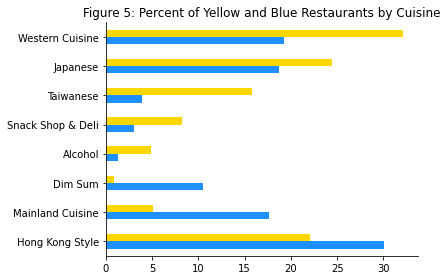

In [118]:
index = [
 "Hong Kong Style",
    "Mainland Cuisine",
    "Dim Sum",
    "Alcohol",
    "Snack Shop & Deli",
    "Taiwanese", 
    "Japanese",
    "Western Cuisine",
    
]
df = pd.DataFrame({'Blue': ((bluesums)*75) / len(blue_meta) ,
    'Yellow': ((yellowsums)*75) / len(yellow_meta),
                  }, index=index)


my_colors = ["dodgerblue", "gold",]
ax = df.plot.barh(color=my_colors, legend=False, title="Figure 5: Percent of Yellow and Blue Restaurants by Cuisine")
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
plt.tight_layout()
# plt.get(False)
plt.savefig("cuisine.png", bbox_inches='tight')

In [241]:
bluesums.loc["Western Cuisine"]
# yellowsums.loc["Western Cuisine"]


1370

In [208]:
df

,Blue,Yellow
Hong Kong Style,0.682784,0.731532
Mainland Cuisine,0.291180,0.265297
Dim Sum,0.150372,0.129522
Alcohol,0.089798,0.080840
Snack Shop & Deli,0.138151,0.143814
Taiwanese,0.256642,0.254578
Japanese,0.565356,0.534614
Western Cuisine,0.727949,0.644038


In [108]:
(y - b).sort_values().tail(20)

Cooked Food Center              -0.000293
Family Friendly                 -0.000254
Social Enterprise Restaurant    -0.000254
Big Bowl Feast                  -0.000254
Latin American                  -0.000254
Online Shop/ Food Distributor   -0.000231
Hot Chili Oil                   -0.000169
Karaoke                         -0.000085
Certified Halal Food            -0.000085
Mediterranean                   -0.000085
Sushi Bar                       -0.000085
Middle Eastern                  -0.000085
Herbal Cuisine                   0.000108
Outdoor                          0.000192
Nepalese                         0.000447
Pet Friendly                     0.000708
Crab Specialty                   0.001170
Food Stall Noodles               0.002363
Steam Hotpot                     0.002595
Snack Shop & Deli                0.005663
dtype: float64

In [109]:
(y - b).sort_values().head(20)

Western Cuisine                     -0.083911
Tea and Coffee                      -0.059117
Hong Kong Style                     -0.051252
Dessert                             -0.048194
Japanese                            -0.030742
Mainland Cuisine                    -0.025883
Dim Sum                             -0.020850
All Day Breakfast                   -0.014018
Stir-Fry                            -0.013210
Food Wise Eateries                  -0.010261
Seafood                             -0.009382
Salt & Sugar Reduction Restaurant   -0.009337
Southeast Asian                     -0.009298
Alcohol                             -0.008958
Korean                              -0.007294
Pizza                               -0.006732
Noodles/Rice Noodles                -0.006612
Hot Pot                             -0.006556
Chinese BBQ                         -0.005569
Salad                               -0.005168
dtype: float64

## Price range and Rating

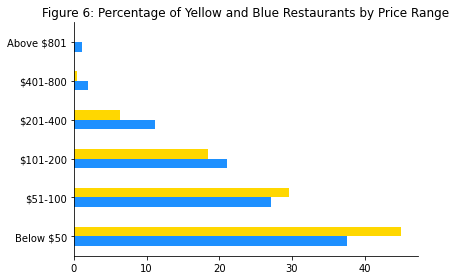

In [120]:
yellow_meta["price_range"] = yellow_meta["price_range"].astype("category")
blue_meta["price_range"] = blue_meta["price_range"].astype("category")
yelpr = yellow_meta[yellow_meta["price_range"].notna()].price_range
bluepr = blue_meta[blue_meta["price_range"].notna()].price_range

df = pd.DataFrame({ "Blue": (bluepr.value_counts()*100 / len(blue_meta)),
    "Yellow": (yelpr.value_counts()*100/ len(yellow_meta))}, index=['Below $50', '$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])
ax = df.plot.barh(color=my_colors, 
                  legend=False, 
                  title="Figure 6: Percentage of Yellow and Blue Restaurants by Price Range",
#                 ylabel="Number of Restaurants"
                 )
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
plt.tight_layout()
plt.savefig("pricerange.png", bbox_inches="tight")


In [357]:
(bluepr.value_counts() / len(blue_meta)).sum()

0.9994686503719449

In [377]:
blue_meta.price_range.unique()


['Below $50', '$101-200', '$51-100', '$201-400', 'Above $801', '$401-800']
Categories (6, object): ['Below $50', '$101-200', '$51-100', '$201-400', 'Above $801', '$401-800']

In [382]:
yel_ave_rat = yellow_meta[yellow_meta.mean_rating.notna()].mean_rating
blue_ave_rat = blue_meta[blue_meta.mean_rating.notna()].mean_rating

In [385]:
np.mean(yel_ave_rat)

3.9252685660906117

In [387]:
np.mean(blue_ave_rat)

3.597671777399205

<AxesSubplot:>

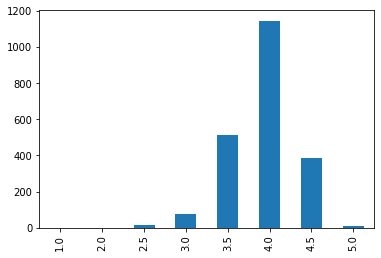

In [425]:
# cattype = CategoricalDtype(categories=[5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0. 1.5, 1, 0.5], ordered=True)
ind = yel_ave_rat.sort_values(ascending=False).value_counts().index.sort_values()
yel_ave_rat.value_counts().loc[ind].plot.bar()

<AxesSubplot:>

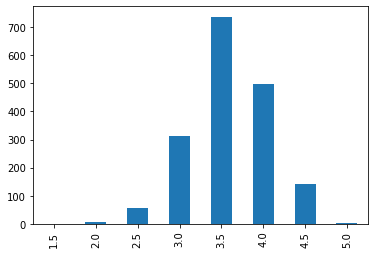

In [426]:

ind = blue_ave_rat.sort_values(ascending=False).value_counts().index.sort_values()
blue_ave_rat.value_counts().loc[ind].plot.bar()

In [132]:
yellow_meta["color"] = "Yellow"
blue_meta["color"] = "Blue"
combined = pd.concat([yellow_meta, blue_meta])

# combined["color"] = pd.Series(combined.index.isin(list(blue_meta.index)), index=combined.index).map({False: "Yellow", True: "Blue"})

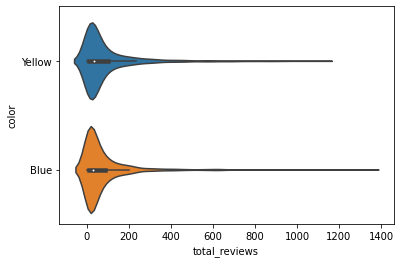

In [133]:
ax = sns.violinplot(x="total_reviews", y="color", data=combined)

In [ ]:
c

In [141]:
combined[combined.color == "Yellow"]

# Xtrain = combined
combined["target"] = (combined["color"] == "Yellow").astype(int)

In [146]:
combined[["OpenRice Area", "district"]]

,OpenRice Area,district
0,Tai Wai,Tai Wai
1,Kwun Tong,Kwun Tong
2,Prince Edward,Prince Edward
3,Sai Wan Ho,Sai Wan Ho
4,Western District,Western District
...,...,...
1881,Mong Kok,Mong Kok
1882,To Kwa Wan,To Kwa Wan
1883,Causeway Bay,Causeway Bay
1884,Tai Koo,Tai Koo


In [143]:
combined.columns

Index(['original_url', 'scrape_time', 'title_main', 'title_add',
       'response_url', 'reviews_url', 'jobs_link', 'num_jobs',
       'additional_info', 'number_of_seats', 'mean_rating', 'bookmark_count',
       'district', 'price_range', 'mean_taste', 'mean_decor', 'mean_service',
       'mean_hygiene', 'mean_value', 'categories_0', 'categories_1',
       'positive_reviews', 'ok_reviews', 'negative_reviews', 'total_reviews',
       'payment_method_0', 'other_Alcoholic_Drinks', 'other_Phone_Reservation',
       'other_TV_Broadcast', 'Name', 'OpenRice Area', 'District Council',
       'Potential Secondary', 'Notes', 'color', 'payment_method_1',
       'payment_method_2', 'payment_method_3', 'payment_method_4',
       'payment_method_5', 'payment_method_6',
       'other_Restaurant_Mode_of_Operation_-_Type_B',
       'other_May_Bring_Your_Own_Wine', 'other_10%_Service_Charge',
       'other_Outdoor_Seating', 'target'],
      dtype='object')

In [147]:
drops = ["original_url", "scrape_time", "title_main", "response_url", 'reviews_url', 'jobs_link',
        "target", 'payment_method_1', 'payment_method_2', 'payment_method_3', 'payment_method_4',
       'payment_method_5', 'payment_method_6','OpenRice Area', "Notes", "Potential Secondary"
        ]
X_train = combined.drop(drops, axis=1)

In [150]:

# X_train
# MAP district into political affiliation [aggregate yellowness score]

,title_add,num_jobs,additional_info,number_of_seats,mean_rating,bookmark_count,district,price_range,mean_taste,mean_decor,...,other_Alcoholic_Drinks,other_Phone_Reservation,other_TV_Broadcast,Name,District Council,color,other_Restaurant_Mode_of_Operation_-_Type_B,other_May_Bring_Your_Own_Wine,other_10%_Service_Charge,other_Outdoor_Seating
0,NaN,NaN,NaN,40.0,3.5,925,Tai Wai,Below $50,30.0,30.0,...,1.0,0.0,1.0,NaN,Sha Tin,Yellow,NaN,NaN,NaN,NaN
1,(Renamed),NaN,NaN,NaN,4.0,600,Kwun Tong,$51-100,40.0,30.0,...,NaN,NaN,NaN,NaN,Kwun Tong,Yellow,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,40.0,4.0,8252,Prince Edward,$101-200,30.0,40.0,...,1.0,1.0,NaN,NaN,Yau Tsim Mong,Yellow,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.5,1663,Sai Wan Ho,Below $50,30.0,20.0,...,NaN,NaN,NaN,NaN,Eastern,Yellow,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,4.0,4659,Western District,$51-100,40.0,40.0,...,NaN,NaN,NaN,NaN,Central & Western,Yellow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,NaN,NaN,NaN,NaN,4.5,198,Mong Kok,$101-200,40.0,40.0,...,NaN,NaN,NaN,NaN,Yau Tsim Mong,Blue,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,3.5,830,To Kwa Wan,$51-100,30.0,30.0,...,NaN,NaN,NaN,NaN,Kowloon City,Blue,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,4.0,12973,Causeway Bay,$101-200,30.0,40.0,...,NaN,NaN,NaN,NaN,Wan Chai,Blue,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,84.0,4.0,2675,Tai Koo,$101-200,40.0,40.0,...,NaN,NaN,NaN,NaN,Eastern,Blue,NaN,NaN,0.0,NaN


In [153]:
X_train["closed"]  = pd.get_dummies(X_train.title_add)["(Closed)"]
X_train = X_train.drop("title_add", axis=1)

In [156]:
# X_train.join(pd.get_dummies(X_train["District Council"]))
# X_train.join(pd.get_dummies(X_train.price_range))
pd.get_dummies(X_train.price_range)

,$101-200,$201-400,$401-800,$51-100,Above $801,Below $50
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1881,1,0,0,0,0,0
1882,0,0,0,1,0,0
1883,1,0,0,0,0,0
1884,1,0,0,0,0,0


## Num seats

In [361]:
yellow_meta[yellow_meta.number_of_seats.notna()].number_of_seats.mean(), blue_meta[blue_meta.number_of_seats.notna()].number_of_seats.mean()

(48.628865979381445, 104.24131274131274)

In [125]:
yellow_meta["Color"] = "Yellow"
blue_meta["Color"] = "Blue"
combined2 = pd.concat([blue_meta, yellow_meta])

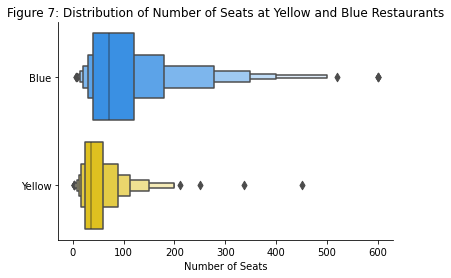

In [131]:
combined3 = combined2[combined2.number_of_seats < 1000]
ax = sns.boxenplot(x="number_of_seats", y="Color", data=combined3, palette=["dodgerblue", "gold"])
# ax.title()
# TODO: insert figure
ax.set(xlabel="Number of Seats", title="Figure 7: Distribution of Number of Seats at Yellow and Blue Restaurants")
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.set_ylabel("")
# ax.set_yticks(False)
plt.savefig("num_seats.png", bbox_inches="tight")

In [88]:
print("Mean number of blue seats, outliers removed")
combined3[(combined3.number_of_seats < 1000 ) & (combined3.color == "Blue")].number_of_seats.mean()

98.29206963249517

In [91]:
print("Mean number of blue seats, outliers included")
combined2[(combined2.color == "Blue")].number_of_seats.mean()

Mean number of blue seats, outliers included


104.07115384615385

In [89]:
combined3[(combined3.number_of_seats < 1000 )& (combined3.color == "Yellow")].number_of_seats.mean()

50.96913580246913

In [83]:
combined2[combined2.number_of_seats > 1000]


,original_url,scrape_time,title_main,title_add,response_url,reviews_url,jobs_link,num_jobs,additional_info,number_of_seats,...,Name,OpenRice Area,District Council,Potential Secondary,Notes,color,Color,other_Alcoholic_Drinks,other_Phone_Reservation,other_TV_Broadcast
779,https://s.openrice.com/QrbS0ICK700~dBgM_spHP,2021-07-02 14:01:27.761585,富臨皇宮,NaN,https://www.openrice.com/en/hongkong/r-fulum-p...,https://www.openrice.com/en/hongkong/r-fulum-p...,https://www.openrice.com/en/hongkong/r-fulum-p...,NaN,NaN,1200.0,...,昭隆美食,Sha Tin,Sha Tin,NaN,NaN,Blue,Blue,NaN,NaN,NaN
1268,https://s.openrice.com/QrbS0tWK000~dzl0nQuyV,2021-07-02 16:20:52.588765,珍寶王國,(Under Renovation),https://www.openrice.com/en/hongkong/r-jumbo-k...,https://www.openrice.com/en/hongkong/r-jumbo-k...,https://www.openrice.com/en/hongkong/r-jumbo-k...,NaN,NaN,1100.0,...,茶泰 Cha Thai,Wong Chuk Hang,Southern,NaN,NaN,Blue,Blue,NaN,NaN,NaN


## Scrap

In [104]:
bluegroup=bluerevs.groupby("id")

In [57]:
subset.count(1)

0        0
1        1
2        1
3        1
4        1
        ..
2036    22
2037    22
2038    22
2039    22
2040     0
Length: 2041, dtype: int64

In [81]:
pd.DataFrame(combined["list_cats"].tolist()).stack(dropna=False)

0     0                NaN
      1    Hong Kong Style
      2             Taiwan
      3     Tea Restaurant
      4                NaN
                ...       
4140  1           Japanese
      2      Sushi/Sashimi
      3                NaN
      4                NaN
      5                NaN
Length: 24846, dtype: object

In [417]:
ls = [5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 
#       1.5, 
      1, 
#       0.5
     ]
cat_type = CategoricalDtype(categories=ls, ordered=True)

In [423]:
yel_ave_rat.sort_values(ascending=False).value_counts().index.sort_values()

Float64Index([1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64')

In [396]:
sns.catplot(y= "total_rating", data=yellow_meta)

,original_url,response_url,reviews_url,jobs_link,num_jobs,additional_info,number_of_seats,mean_rating,bookmark_count,district,...,payment_method_5,other_Online_Reservation,other_VIP_Room,other_Reward_Dining_Points,other_Live_Music,categories_5,other_TV_Broadcast,payment_method_6,payment_method_7,Name
id,,,,,,,,,,,,,,,,,,,,,
4665,https://s.openrice.com/QrbS0yKC100,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,NaN,NaN,50.0,3.5,4411.0,Tsim Sha Tsui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4667,https://s.openrice.com/QrbS0wJ0A00,https://www.openrice.com/en/hongkong/r-13-food...,https://www.openrice.com/en/hongkong/r-13-food...,https://www.openrice.com/en/hongkong/r-13-food...,NaN,NaN,NaN,4.5,353.0,Shau Kei Wan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4659,https://s.openrice.com/QrbS0TRu200,https://www.openrice.com/en/hongkong/r-5oc-sai...,https://www.openrice.com/en/hongkong/r-5oc-sai...,https://www.openrice.com/en/hongkong/r-5oc-sai...,NaN,NaN,NaN,3.5,1651.0,Sai Wan Ho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4661,https://s.openrice.com/QrbS0zqO4W0~dJdzKlI9X,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,NaN,NaN,NaN,4.0,1187.0,Tsuen Wan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4663,https://s.openrice.com/QrbS07U0100~dJdzKlI9X,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,https://www.openrice.com/en/hongkong/r-101-tai...,NaN,NaN,NaN,3.5,887.0,Tuen Mun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# bluedummies = 
blue_meta.join(dummies)

,original_url,response_url,reviews_url,jobs_link,num_jobs,additional_info,number_of_seats,payment_method_0,payment_method_1,payment_method_2,...,Upper-floor Cafe,Vegetarian,Vietnamese,Western,Western Restaurant,Wine,Wonton/Dumpling,Xinjiang,Yoshoku,Yunnan
id,,,,,,,,,,,,,,,,,,,,,
218,https://s.openrice.com/QrbS0S2O900~doI7kMWdh,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,16.0,Visa,Master,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,https://s.openrice.com/QrbS0d4W900~dBgM_spHP,https://www.openrice.com/en/hongkong/r-2-2-cof...,https://www.openrice.com/en/hongkong/r-2-2-cof...,https://www.openrice.com/en/hongkong/r-2-2-cof...,NaN,NaN,NaN,Cash,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
225,https://s.openrice.com/QrbS0Dvm900,https://www.openrice.com/en/hongkong/r-1%E6%A8...,https://www.openrice.com/en/hongkong/r-1%E6%A8...,https://www.openrice.com/en/hongkong/r-1%E6%A8...,NaN,NaN,NaN,AlipayHK,Alipay,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,https://s.openrice.com/QrbS0RbO800,https://www.openrice.com/en/hongkong/r-sixty-o...,https://www.openrice.com/en/hongkong/r-sixty-o...,https://www.openrice.com/en/hongkong/r-sixty-o...,NaN,NaN,80.0,Visa,Master,AlipayHK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,https://s.openrice.com/QrbS0Y5G900~doI7kMWdh,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,15.0,Visa,Master,Cash,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,https://s.openrice.com/QrbS0zEU400,https://www.openrice.com/en/hongkong/r-%E9%A4%...,https://www.openrice.com/en/hongkong/r-%E9%A4%...,https://www.openrice.com/en/hongkong/r-%E9%A4%...,NaN,NaN,NaN,AlipayHK,Alipay,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2157,https://s.openrice.com/QrbS0WiO900,https://www.openrice.com/en/hongkong/r-uo-show...,https://www.openrice.com/en/hongkong/r-uo-show...,https://www.openrice.com/en/hongkong/r-uo-show...,NaN,NaN,NaN,Visa,Master,Alipay,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2139,https://s.openrice.com/QrbS0skG800~dfFvOE8UE,https://www.openrice.com/en/hongkong/r-hong-ko...,https://www.openrice.com/en/hongkong/r-hong-ko...,https://www.openrice.com/en/hongkong/r-hong-ko...,NaN,【手機外賣點餐】手機落單後到分店自取 更可享折扣優惠 💰💰 http://bit.ly/hk...,NaN,Visa,Master,Cash,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
dummies

,All Day Breakfast,All-you-can-eat,American,Australian,BBQ,Bakery,Bar,Beijing,British,Buffet,...,Upper-floor Cafe,Vegetarian,Vietnamese,Western,Western Restaurant,Wine,Wonton/Dumpling,Xinjiang,Yoshoku,Yunnan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(yellow_meta[yellowcatcols]])


array([[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [79]:
yellow_meta["list_cats"] = yellow_meta["list_cats"].apply

0     [Hong Kong Style, Taiwan, Tea Restaurant, nan,...
1                [Italian, Western, nan, nan, nan, nan]
2       [Taiwan, Snack Shop & Deli, nan, nan, nan, nan]
3                     [Taiwan, nan, nan, nan, nan, nan]
4     [Hong Kong Style, Taiwan, Tea Restaurant, nan,...
                            ...                        
12           [Western, Coffee Shop, nan, nan, nan, nan]
13        [Japanese, Sushi/Sashimi, nan, nan, nan, nan]
14    [Taiwan, Taiwanese Drink, Noodles/Rice Noodles...
15      [Taiwan, Snack Shop & Deli, nan, nan, nan, nan]
16    [Western, Bakery, Meatless Menu, Coffee Shop, ...
Name: list_cats, Length: 2250, dtype: object

In [110]:
exploded = df.explode("A")
exploded.index

Int64Index([0, 0, 0, 1, 2, 3, 3], dtype='int64')

In [111]:
yellow_stacked = yellow_meta[yellowcatcols].stack()
# pd.crosstab(ind, yellow_stacked)
# .transpose()
# pd.crosstab(list(accum_cats), blue_meta[bluecatcols])

In [27]:
blue_df.head()

,id,original_url,response_url,reviews_url,jobs_link,num_jobs,additional_info,number_of_seats,payment_method_0,payment_method_1,...,mean_hygiene,mean_value,categories_0,categories_1,positive_reviews,ok_reviews,negative_reviews,total_reviews,categories_2,categories_3
0,218,https://s.openrice.com/QrbS0S2O900~doI7kMWdh,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,16.0,Visa,Master,...,40.0,30.0,Western,Coffee Shop,90,1,0,91,NaN,NaN
1,229,https://s.openrice.com/QrbS0d4W900~dBgM_spHP,https://www.openrice.com/en/hongkong/r-2-2-cof...,https://www.openrice.com/en/hongkong/r-2-2-cof...,https://www.openrice.com/en/hongkong/r-2-2-cof...,NaN,NaN,NaN,Cash,NaN,...,40.0,30.0,Western,Coffee Shop,4,1,1,6,NaN,NaN
2,225,https://s.openrice.com/QrbS0Dvm900,https://www.openrice.com/en/hongkong/r-1%E6%A8...,https://www.openrice.com/en/hongkong/r-1%E6%A8...,https://www.openrice.com/en/hongkong/r-1%E6%A8...,NaN,NaN,NaN,AlipayHK,Alipay,...,30.0,30.0,Hong Kong Style,Tea Restaurant,0,4,2,6,NaN,NaN
3,231,https://s.openrice.com/QrbS0RbO800,https://www.openrice.com/en/hongkong/r-sixty-o...,https://www.openrice.com/en/hongkong/r-sixty-o...,https://www.openrice.com/en/hongkong/r-sixty-o...,NaN,NaN,80.0,Visa,Master,...,40.0,30.0,Western,Fine Dining,12,0,1,13,NaN,NaN
4,220,https://s.openrice.com/QrbS0Y5G900~doI7kMWdh,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,https://www.openrice.com/en/hongkong/r-arabica...,NaN,NaN,15.0,Visa,Master,...,40.0,30.0,Western,Coffee Shop,149,10,4,163,NaN,NaN


In [165]:
yellow_meta.categories_1.value_counts() / len(yellow_meta)

Tea and Coffee                       0.109424
Dessert                              0.105851
Western Cuisine                      0.096918
Taiwanese                            0.096025
Japanese                             0.090665
Noodles/Rice Noodles                 0.051809
Snack Shop & Deli                    0.051362
Hot Pot                              0.029477
Alcohol                              0.028584
Food Stall Noodles                   0.027691
All Day Breakfast                    0.025011
Sandwich                             0.019652
Seafood                              0.016525
Vegetarian                           0.015185
Skewer                               0.014292
Pizza                                0.012952
Roast Meat                           0.012506
Fast Food                            0.012059
Hong Kong Style                      0.011612
Mainland Cuisine                     0.011166
Upper-floor Cafe                     0.008486
Southeast Asian                   

In [164]:
blue_meta.categories_1.value_counts() / len(blue_meta)

Tea and Coffee                       0.156748
Dessert                              0.102019
Noodles/Rice Noodles                 0.088735
Japanese                             0.074389
Western Cuisine                      0.061105
Dim Sum                              0.048353
Hot Pot                              0.048353
Seafood                              0.032412
Stir-Fry                             0.029224
Hong Kong Style                      0.028693
Taiwanese                            0.022848
Mainland Cuisine                     0.021785
Southeast Asian                      0.018597
Chinese BBQ                          0.015940
Snack Shop & Deli                    0.014346
Fast Food                            0.012752
Pizza                                0.012221
Roast Meat                           0.011690
Food Stall Noodles                   0.010627
Salt & Sugar Reduction Restaurant    0.008502
Vegetarian                           0.008502
Steak House                       